#### Summer of Reproducibility - noWorkflow Base Experiment - Notebook 1
This Jupyter Notebook is dedicated to guiding you through the applications of noWorkflow in Data Science and Machine Learning. It is the outcome of our participation in the Summer of Reproducibility at OSPO UCSC 2023, utilizing [noWorkflow](https://github.com/gems-uff/noworkflow).

This Notebook serves as a use case based on the problem of Fraud Detection. We have partially replicated the work entitled "The Effect of Feature Extraction and Data Sampling on Credit Card Fraud Detection." Interested readers are encouraged to refer to the original paper [here](https://link.springer.com/article/10.1186/s40537-023-00684-w).

For the sake of clarity, we have divided this experiment into different notebooks:

1. Covers the steps from reading the dataset to a Random Forest model training, configuring a single trial.
2. Repeats all previous steps but with changes in the experimental setup, such as modified hyperparameters.
3. Utilizes noWorkflow to summarize the results from previous trials.
4. Repeat the experiment, changing the model and the order of operations.
5. Compares the modifications and differences between the last and first experiments.

**Please, remember to select the noWorkflow kernel before running these Notebooks.**

In [1]:
import pandas as pd
from noworkflow.now.tagging.var_tagging import backward_deps, \
    global_backward_deps, store_operations, resume_trials, trial_diff, \
    trial_intersection_diff, var_tag_plot, var_tag_values

## Comparision Notebook

Now we have added the last trial to our experiment's register. Let's compare it with the first experimental setup from Notebook 1.

In [10]:
list_id = resume_trials()
list_id

['edb94455-f97b-46f0-b30e-ed01eaf81081',
 'b86773c3-a3b7-40d0-a3ac-5ab4278826c2',
 'c33177a6-88be-4f78-ae96-ede68a5ab142']

### Comparing the common operations in both trials

We can observe that, from the perspective of hyperparameters, there are the following operations that remained the same across the two trials:

In [12]:
trial_intersection_diff(list_id[0], list_id[2])

,key,81081,ab142
0,"now_variable('pca_components', 3)",3,3
1,roc_metric,0.817305710162853,0.8780663780663781
2,y_pred,complex data type,complex data type
3,df,complex data type,complex data type
4,rus,complex data type,complex data type
5,X_resampled,complex data type,complex data type
6,"roc_auc_score(y_test, y_pred)",0.817305710162853,0.8780663780663781
7,PCA(n_components=pca_components),PCA(n_components=3),PCA(n_components=3)
8,X_pca,complex data type,complex data type
9,"now_variable('roc_metric', roc_auc_score(y_tes...",0.817305710162853,0.8780663780663781


### Comparing the full operations set and its order in both trials

Here, we can spot significant differences. The first one is that the models changed. The first trial used a random forest classifier, and the second one was an XGBoost. Moreover, the first trial executed a RandomUnderSampler operation followed by a PCA, and the second one performed the PCA first and then the RandomUnderSampler. Finally, the roc_score changed from 0.81 to 0.87 due to these modifications.

In [4]:
trial_diff(list_id[0], list_id[-1])

f,1,"y_test, complex data type",f,1,"y_test, complex data type"
n,2,"RandomForestClassifier(), complex data type",n,,
,3,"now_variable('model', RandomForestClassifier()), complex data type",,2,"now_variable('model', xgb.XGBClassifier()), complex data type"
,4,"rf, complex data type",,3,"xgb_model, complex data type"
,5,"X_resampled, complex data type",,,
,6,"RandomUnderSampler(random_state=random_seed), complex data type",,,
,7,"rus, complex data type",,,
,8,"now_variable('pca_components', 3), 3",,4,"now_variable('pca_components', 3), 3"
,9,"pca_components, 3",,5,"pca_components, 3"
,10,"PCA(n_components=pca_components), PCA(n_components=3)",,6,"PCA(n_components=pca_components), PCA(n_components=3)"
,11,"pca, PCA(n_components=3)",,7,"pca, PCA(n_components=3)"


### A graphical display of tagged variables

The numerical variables subject to tagging can be easily displayed without further commands at the end of executions. Here we are charting the values of all values of *roc_metric* and *f1_metric*. We can see that, across all trials, the second trial presented the best results in both metrics.

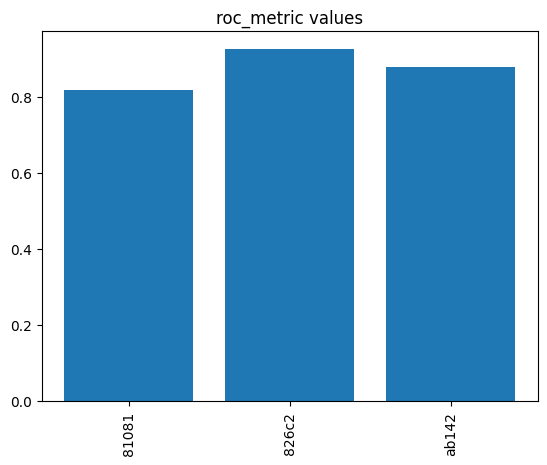

In [13]:
var_tag_plot('roc_metric')

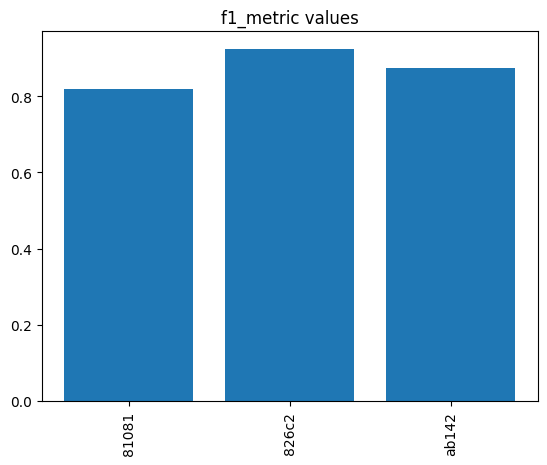

In [14]:
var_tag_plot('f1_metric')

### Retrieving data in Pandas Dataframes

Here we are retrieving values from numerical and textual-tagged variables. Below are the data frames for the *roc_metric*, *f1_metric*, and *model* tags:

In [7]:
var_tag_values('roc_metric')

,trial_id,short_trial_id,tag,value
0,edb94455-f97b-46f0-b30e-ed01eaf81081,81081,roc_metric,0.817305710162853
1,b86773c3-a3b7-40d0-a3ac-5ab4278826c2,826c2,roc_metric,0.9254794520547944
2,c33177a6-88be-4f78-ae96-ede68a5ab142,ab142,roc_metric,0.8780663780663781


In [15]:
var_tag_values('f1_metric')

,trial_id,short_trial_id,tag,value
0,edb94455-f97b-46f0-b30e-ed01eaf81081,81081,f1_metric,0.8181818181818183
1,b86773c3-a3b7-40d0-a3ac-5ab4278826c2,826c2,f1_metric,0.9236111111111112
2,c33177a6-88be-4f78-ae96-ede68a5ab142,ab142,f1_metric,0.875


In [8]:
var_tag_values('model')

,trial_id,short_trial_id,tag,value
0,edb94455-f97b-46f0-b30e-ed01eaf81081,81081,model,RandomForestClassifier()
1,b86773c3-a3b7-40d0-a3ac-5ab4278826c2,826c2,model,RandomForestClassifier()
2,c33177a6-88be-4f78-ae96-ede68a5ab142,ab142,model,"XGBClassifier(base_score=None, booster=None, c..."
